In [1]:
import pandas as pd
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = None
pd.set_option('display.expand_frame_repr', False)
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
df = pd.read_excel(r'datasets/sample.xls')

In [4]:
df.head()

,STATE,DISTRICT,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016
0,MADHYA PRADESH,JHABUA,6.24,NaN,NaN,NaN,9.64,NaN,NaN,6.83,NaN,NaN,5.68,NaN,7.37
1,JAMMU & KASHMIR,JAMMU,5.91,NaN,NaN,NaN,5.49,NaN,NaN,4.50,NaN,NaN,5.13,NaN,5.21
2,BIHAR,DARBHANGA,3.30,NaN,NaN,NaN,4.44,NaN,NaN,4.23,NaN,NaN,3.65,NaN,4.76
3,BIHAR,SHEOHAR,1.44,NaN,NaN,NaN,2.76,NaN,NaN,3.25,NaN,NaN,2.52,NaN,3.04
4,MIZORAM,LUNGLEI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sort_values(['STATE', 'DISTRICT'], ascending=[True, True])

,STATE,DISTRICT,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016
568,ANDAMAN & NICOBAR,NICOBAR,NaN,NaN,NaN,NaN,4.16,NaN,NaN,NaN,NaN,NaN,1.80,NaN,NaN
394,ANDAMAN & NICOBAR,NORTH & MIDDLE ANDAMAN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,NaN,0.93,NaN,NaN
403,ANDAMAN & NICOBAR,SOUTH ANDAMAN,NaN,NaN,NaN,NaN,2.58,NaN,NaN,NaN,NaN,NaN,1.11,NaN,NaN
13,ANDHRA PRADESH,ANANTAPUR,8.35,NaN,NaN,NaN,9.53,NaN,NaN,9.63,NaN,NaN,7.36,NaN,6.75
637,ANDHRA PRADESH,CHITTOOR,8.67,NaN,NaN,NaN,10.14,NaN,NaN,9.96,NaN,NaN,7.91,NaN,2.67
178,ANDHRA PRADESH,EAST GODAVARI,3.92,NaN,NaN,NaN,4.59,NaN,NaN,2.96,NaN,NaN,3.36,NaN,3.41
321,ANDHRA PRADESH,GUNTUR,3.60,NaN,NaN,NaN,5.42,NaN,NaN,4.59,NaN,NaN,4.99,NaN,5.06
333,ANDHRA PRADESH,KRISHNA,3.74,NaN,NaN,NaN,5.17,NaN,NaN,3.91,NaN,NaN,4.97,NaN,5.19
14,ANDHRA PRADESH,KURNOOL,5.07,NaN,NaN,NaN,7.44,NaN,NaN,8.21,NaN,NaN,6.06,NaN,7.06
412,ANDHRA PRADESH,PRAKASAM,5.45,NaN,NaN,NaN,7.89,NaN,NaN,7.36,NaN,NaN,7.72,NaN,7.42


In [6]:
#opening the vector map
shp_path = "map/india_ds.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

In [7]:
len(sf.shapes())

482

In [8]:
sf.shape()

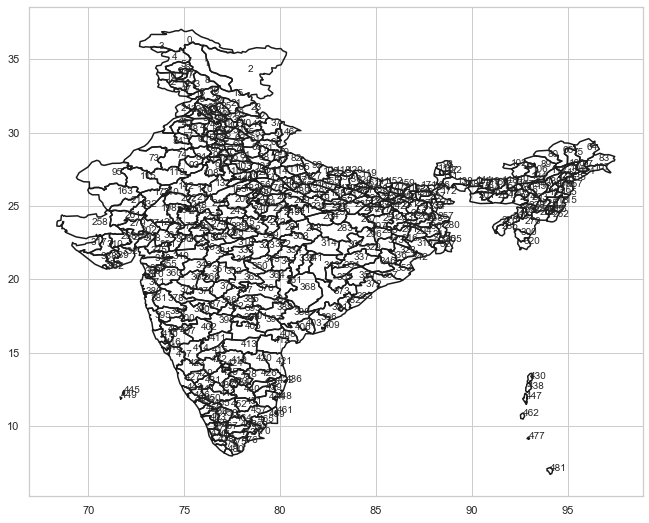

In [9]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map
plot_map(sf)

In [10]:
# set the filepath and load in a shapefile
fp = "map/india_ds.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,DST_ID,DISTRICT,STATE,geometry
0,1,Gilgit,JAMMU AND KASHMIR,"POLYGON ((74.30254 35.65012, 73.84581 35.82461..."
1,2,Kargil,JAMMU AND KASHMIR,"POLYGON ((74.89890 35.62939, 75.04768 35.77413..."
2,3,Ladakh,JAMMU AND KASHMIR,"POLYGON ((75.98059 35.93823, 76.16165 35.91142..."
3,4,Chilas,JAMMU AND KASHMIR,"POLYGON ((73.27244 35.81596, 73.32610 35.79237..."
4,5,Kupwara,JAMMU AND KASHMIR,"POLYGON ((74.30254 35.65012, 74.54015 35.50695..."


ImportError: The descartes package is required for plotting polygons in geopandas.

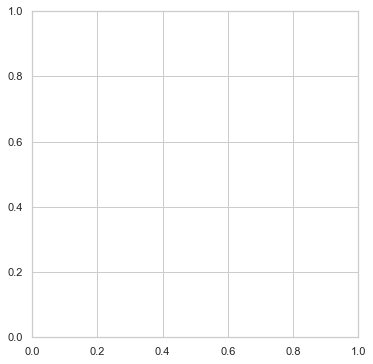

In [11]:
map_df.plot()